In [1]:
#import librarie
from zipfile import ZipFile 
import os.path
from os import path
import pandas as pd
import numpy as np
import base64
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import groupby
from matplotlib import font_manager



In [3]:
[f for f in matplotlib.font_manager.fontManager.ttflist]

[<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>,
 <Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>,
 <Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>,
 <Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>,
 <Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>,
 <Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>,
 <Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansM

In [4]:
fontP = font_manager.FontProperties()
fontP.set_family('Microsoft YaHei')
fontP.set_size(14)
plt.rcParams["font.family"] = "Microsoft YaHei"


In [109]:
%%bash

# pip3 install -U seaborn

fc-list :lang=zh

# Load Data

In [6]:
#load into data frame
file_name = "corpus_poem.zip"

poems_data = []
with ZipFile(file_name) as z:
    for filename in z.namelist():
        if not os.path.isdir(filename):
            # read the file
            with z.open(filename) as f:
                poem = {}
                for line in f:
                    new_line = line.decode('utf-8').replace("\n","")
                    split_line = new_line.split(":");
                    poem[split_line[0]] = split_line[1]
                poems_data.append(poem)
poems_data = poems_data[1:]
poems_dataframe = pd.DataFrame(poems_data)                

# Exploratory Data Analysis (EDA)

In [7]:
poems_dataframe.head()

,dynasty,author,tags,star,author_stars,title,content
0,唐代,杜牧,,1,1692,和野人殷潜之题筹笔驿十四韵,三吴裂婺女，九锡狱孤儿。霸主业未半，本朝心是谁。永安宫受诏，筹笔驿沉思。画地乾坤在，濡毫胜负...
1,清代,纳兰性德,写景;伤春,13,1951,四和香·麦浪翻晴风飐柳,麦浪翻晴风飐柳，已过伤春候。因甚为他成僝僽？毕竟是春迤逗。红药阑边携素手，暖语浓于酒。盼到园...
2,唐代,刘禹锡,,1,2116,奉送浙西李仆射相公赴镇,建节东行是旧游，欢声喜气满吴州。郡人重得黄丞相，童子争迎郭细侯。诏下初辞温室树，梦中先到景阳...
3,唐代,王维,,1,2192,大同殿柱产玉芝，龙池上有庆云神光照殿，百,欲笑周文歌宴镐，遥轻汉武乐横汾。岂知玉殿生三秀，讵有铜池出五云。陌上尧樽倾北斗，楼前舜乐动南...
4,唐代,王维,,2,2192,冬日游览,步出城东门，试骋千里目。青山横苍林，赤日团平陆。渭北走邯郸，关东出函谷。秦地万方会，来朝九州...


In [8]:
poems_dataframe.describe()

,dynasty,author,tags,star,author_stars,title,content
count,92121,92121,92121,92121,92121,92121,92121
unique,15,1236,5129,919,245,83614,85713
top,宋代,陆游,,1,0,句,娟娟月满。冉冉梅花暖。春意初长寒力浅。渐拟芳菲满眼。当时吉梦重重。间生天子三公。付与人间桃李...
freq,53453,3762,85980,73789,5678,225,4


## Dynasties Summary

In [9]:
group_by_dynasty = poems_dataframe.groupby('dynasty').describe()

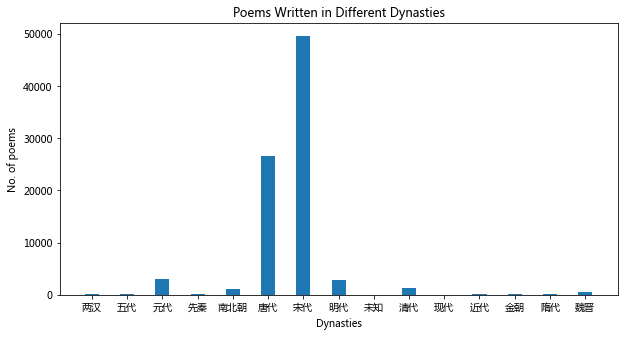

In [16]:
poems_by_dynasty = group_by_dynasty['content', 'unique']
# creating the dataset 
dynasties = list(poems_by_dynasty.index) 
poems_count = list(poems_by_dynasty) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(dynasties, poems_count,  
        width = 0.4) 
  
plt.xlabel("Dynasties") 
plt.ylabel("No. of poems") 
plt.title("Poems Written in Different Dynasties") 
plt.show() 

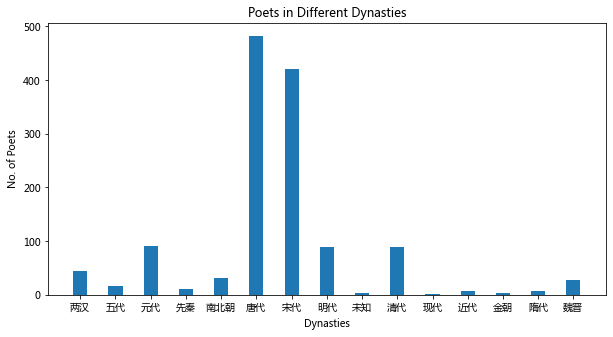

In [21]:
poets_by_dynasty = group_by_dynasty['author', 'unique']
# creating the dataset 
dynasties = list(poets_by_dynasty.index) 
poets_count = list(poets_by_dynasty) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(dynasties, poets_count,  
        width = 0.4) 
  
plt.xlabel("Dynasties") 
plt.ylabel("No. of Poets") 
plt.title("Poets in Different Dynasties") 
plt.show() 

## Poets Summary

In [27]:
group_by_author = poems_dataframe.groupby('author').describe()
group_by_author = group_by_author.sort_values(by=[('title', 'unique')],ascending=False)

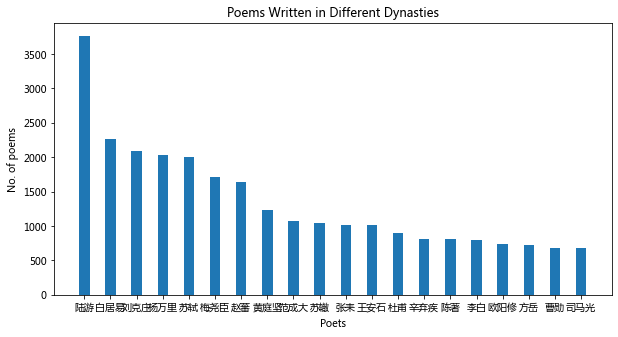

In [29]:
poems_by_author = group_by_author['title', 'unique']
# creating the dataset 
poets = list(poems_by_author.index)[:20] 
poems_count = list(poems_by_author)[:20] 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(poets, poems_count,  
        width = 0.4) 
  
plt.xlabel("Poets") 
plt.ylabel("No. of poems") 
plt.title("Poems Written in Different Dynasties") 
plt.show()

## Tags Summary

## Objects Summary (Most frequent word/two words)